<a href="https://colab.research.google.com/github/Raju-24-25/Model-Building-Handsons/blob/main/Stock_Price_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📌 1. Problem Statement

Objective:
Build a time series forecasting model that predicts the future closing price of a stock (Netflix – NFLX) using historical market data.

* The project involves:

       Fetching real stock data using Yahoo Finance API

       Cleaning and filling missing business dates

       Checking stationarity

       Applying differencing

       Performing time series decomposition

       Selecting ARIMA parameters using ACF & PACF

       Training ARIMA and SARIMA models

       Visualizing predictions vs actual values

Business Use Case:
Such a model can assist traders, analysts, and investors in identifying price trends and making informed decisions.

# Step 1 – Install & Import Libraries

In [113]:
!pip install yfinance

In [114]:
import yfinance as yf

# Step 2 – Download Stock Data

In [115]:
ticker_symbol = 'NFLX'

In [116]:
data = yf.Ticker(ticker=ticker_symbol)

In [117]:
df = data.history('4y').reset_index()

In [118]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-01-12 00:00:00-05:00,54.426998,54.426998,53.202000,53.722000,37874000,0.0,0.0
1,2022-01-13 00:00:00-05:00,53.706001,54.078999,51.826000,51.919998,44751000,0.0,0.0
2,2022-01-14 00:00:00-05:00,51.759998,53.837002,51.188000,52.569000,78611000,0.0,0.0
3,2022-01-18 00:00:00-05:00,52.007999,52.174999,50.868000,51.080002,48391000,0.0,0.0
4,2022-01-19 00:00:00-05:00,51.500000,52.320999,51.050999,51.585999,43535000,0.0,0.0
...,...,...,...,...,...,...,...,...
998,2026-01-06 00:00:00-05:00,91.540001,91.639999,89.739998,90.650002,43331000,0.0,0.0
999,2026-01-07 00:00:00-05:00,91.559998,92.419998,90.059998,90.730003,36525700,0.0,0.0
1000,2026-01-08 00:00:00-05:00,90.449997,91.250000,89.580002,90.529999,40068700,0.0,0.0
1001,2026-01-09 00:00:00-05:00,90.029999,90.050003,88.320000,89.459999,55504000,0.0,0.0


# Step 3 – Identify Date Range

In [119]:
start_date = df['Date'].min()
end_date = df['Date'].max()

In [120]:
print(f'Start Date :',start_date)
print(f'Start Date :',end_date)

Start Date : 2022-01-12 00:00:00-05:00
Start Date : 2026-01-12 00:00:00-05:00


In [121]:
import pandas as pd

# Step 4 – Generate Missing Business Dates

In [122]:
dates = pd.date_range(start=start_date,end=end_date,freq='B')

In [123]:
dates

DatetimeIndex(['2022-01-12 00:00:00-05:00', '2022-01-13 00:00:00-05:00',
               '2022-01-14 00:00:00-05:00', '2022-01-17 00:00:00-05:00',
               '2022-01-18 00:00:00-05:00', '2022-01-19 00:00:00-05:00',
               '2022-01-20 00:00:00-05:00', '2022-01-21 00:00:00-05:00',
               '2022-01-24 00:00:00-05:00', '2022-01-25 00:00:00-05:00',
               ...
               '2025-12-30 00:00:00-05:00', '2025-12-31 00:00:00-05:00',
               '2026-01-01 00:00:00-05:00', '2026-01-02 00:00:00-05:00',
               '2026-01-05 00:00:00-05:00', '2026-01-06 00:00:00-05:00',
               '2026-01-07 00:00:00-05:00', '2026-01-08 00:00:00-05:00',
               '2026-01-09 00:00:00-05:00', '2026-01-12 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', length=1044, freq='B')

In [124]:
missing_dates = dates.difference(df['Date'])
missing_dates

DatetimeIndex(['2022-01-17 00:00:00-05:00', '2022-02-21 00:00:00-05:00',
               '2022-04-15 00:00:00-04:00', '2022-05-30 00:00:00-04:00',
               '2022-06-20 00:00:00-04:00', '2022-07-04 00:00:00-04:00',
               '2022-09-05 00:00:00-04:00', '2022-11-24 00:00:00-05:00',
               '2022-12-26 00:00:00-05:00', '2023-01-02 00:00:00-05:00',
               '2023-01-16 00:00:00-05:00', '2023-02-20 00:00:00-05:00',
               '2023-04-07 00:00:00-04:00', '2023-05-29 00:00:00-04:00',
               '2023-06-19 00:00:00-04:00', '2023-07-04 00:00:00-04:00',
               '2023-09-04 00:00:00-04:00', '2023-11-23 00:00:00-05:00',
               '2023-12-25 00:00:00-05:00', '2024-01-01 00:00:00-05:00',
               '2024-01-15 00:00:00-05:00', '2024-02-19 00:00:00-05:00',
               '2024-03-29 00:00:00-04:00', '2024-05-27 00:00:00-04:00',
               '2024-06-19 00:00:00-04:00', '2024-07-04 00:00:00-04:00',
               '2024-09-02 00:00:00-04:00', '2024-1

In [125]:
df1 = pd.DataFrame({'Date':missing_dates})
df1

,Date
0,2022-01-17 00:00:00-05:00
1,2022-02-21 00:00:00-05:00
2,2022-04-15 00:00:00-04:00
3,2022-05-30 00:00:00-04:00
4,2022-06-20 00:00:00-04:00
5,2022-07-04 00:00:00-04:00
6,2022-09-05 00:00:00-04:00
7,2022-11-24 00:00:00-05:00
8,2022-12-26 00:00:00-05:00
9,2023-01-02 00:00:00-05:00


# Step 5 – Merge Missing Dates

In [126]:
df_final = pd.concat([df,df1],ignore_index=True)
df_final

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-01-12 00:00:00-05:00,54.426998,54.426998,53.202000,53.722000,37874000.0,0.0,0.0
1,2022-01-13 00:00:00-05:00,53.706001,54.078999,51.826000,51.919998,44751000.0,0.0,0.0
2,2022-01-14 00:00:00-05:00,51.759998,53.837002,51.188000,52.569000,78611000.0,0.0,0.0
3,2022-01-18 00:00:00-05:00,52.007999,52.174999,50.868000,51.080002,48391000.0,0.0,0.0
4,2022-01-19 00:00:00-05:00,51.500000,52.320999,51.050999,51.585999,43535000.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1039,2025-07-04 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1040,2025-09-01 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1041,2025-11-27 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1042,2025-12-25 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
df_final = df_final.sort_values(by='Date')
df_final

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-01-12 00:00:00-05:00,54.426998,54.426998,53.202000,53.722000,37874000.0,0.0,0.0
1,2022-01-13 00:00:00-05:00,53.706001,54.078999,51.826000,51.919998,44751000.0,0.0,0.0
2,2022-01-14 00:00:00-05:00,51.759998,53.837002,51.188000,52.569000,78611000.0,0.0,0.0
1003,2022-01-17 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-01-18 00:00:00-05:00,52.007999,52.174999,50.868000,51.080002,48391000.0,0.0,0.0
...,...,...,...,...,...,...,...,...
998,2026-01-06 00:00:00-05:00,91.540001,91.639999,89.739998,90.650002,43331000.0,0.0,0.0
999,2026-01-07 00:00:00-05:00,91.559998,92.419998,90.059998,90.730003,36525700.0,0.0,0.0
1000,2026-01-08 00:00:00-05:00,90.449997,91.250000,89.580002,90.529999,40068700.0,0.0,0.0
1001,2026-01-09 00:00:00-05:00,90.029999,90.050003,88.320000,89.459999,55504000.0,0.0,0.0


# Step 6 – Data Inspection

In [128]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 1002
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          1044 non-null   datetime64[ns, America/New_York]
 1   Open          1003 non-null   float64                         
 2   High          1003 non-null   float64                         
 3   Low           1003 non-null   float64                         
 4   Close         1003 non-null   float64                         
 5   Volume        1003 non-null   float64                         
 6   Dividends     1003 non-null   float64                         
 7   Stock Splits  1003 non-null   float64                         
dtypes: datetime64[ns, America/New_York](1), float64(7)
memory usage: 73.4 KB


In [129]:
df_final.isnull().sum()

,0
Date,0
Open,41
High,41
Low,41
Close,41
Volume,41
Dividends,41
Stock Splits,41


# Step 7 – Select Required Columns

In [130]:
DF = df_final[['Date','Close']]
DF

,Date,Close
0,2022-01-12 00:00:00-05:00,53.722000
1,2022-01-13 00:00:00-05:00,51.919998
2,2022-01-14 00:00:00-05:00,52.569000
1003,2022-01-17 00:00:00-05:00,NaN
3,2022-01-18 00:00:00-05:00,51.080002
...,...,...
998,2026-01-06 00:00:00-05:00,90.650002
999,2026-01-07 00:00:00-05:00,90.730003
1000,2026-01-08 00:00:00-05:00,90.529999
1001,2026-01-09 00:00:00-05:00,89.459999


In [131]:
DF.isnull().sum()

,0
Date,0
Close,41


In [132]:
DF.fillna(method='ffill',inplace=True)

/tmp/ipython-input-2276501860.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  DF.fillna(method='ffill',inplace=True)
/tmp/ipython-input-2276501860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF.fillna(method='ffill',inplace=True)


In [133]:
DF.isnull().sum()

,0
Date,0
Close,0


In [134]:
DF

,Date,Close
0,2022-01-12 00:00:00-05:00,53.722000
1,2022-01-13 00:00:00-05:00,51.919998
2,2022-01-14 00:00:00-05:00,52.569000
1003,2022-01-17 00:00:00-05:00,52.569000
3,2022-01-18 00:00:00-05:00,51.080002
...,...,...
998,2026-01-06 00:00:00-05:00,90.650002
999,2026-01-07 00:00:00-05:00,90.730003
1000,2026-01-08 00:00:00-05:00,90.529999
1001,2026-01-09 00:00:00-05:00,89.459999


# Step 8 – Visualization

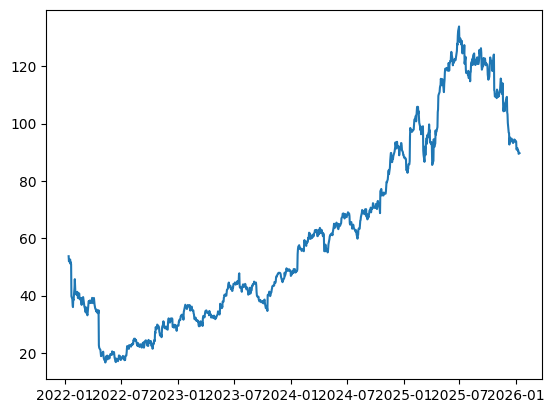

In [135]:
import matplotlib.pyplot as plt
plt.plot(DF['Date'],DF['Close'])
plt.show()

# Step 9 – Stationarity Test (ADF)

In [136]:
# Stationarity

from statsmodels.tsa.stattools import adfuller

p_value = adfuller(DF['Close'])[1]
print(f'P-value :',p_value)

P-value : 0.8912685285151508


In [137]:
if p_value <= 0.05:
  print('Data is Statioanary.')
else:
  print('Data is Non-Statioanary.')

Data is Non-Statioanary.


# Step 10 – Differencing

In [138]:
DF1 = DF.copy()

In [139]:
DF1['Close'] = DF1['Close'].diff()
DF1.dropna(inplace=True)

In [140]:
p_value = adfuller(DF1['Close'])[1]
print(f'P-value :',p_value)

P-value : 0.0


In [141]:
if p_value <= 0.05:
  print('Data is Statioanary.')
else:
  print('Data is Non-Statioanary.')

Data is Statioanary.


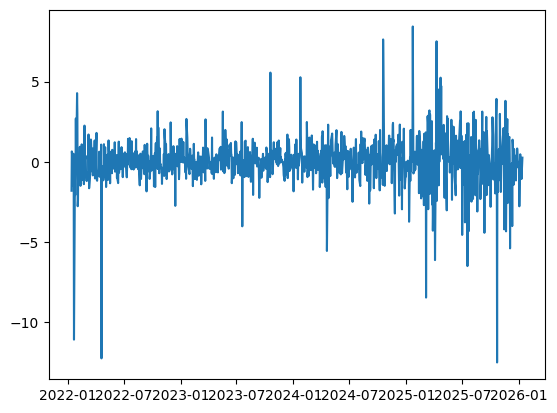

In [142]:
plt.plot(DF1['Date'], DF1['Close'])
plt.show()

In [143]:
# d = 1
DF

,Date,Close
0,2022-01-12 00:00:00-05:00,53.722000
1,2022-01-13 00:00:00-05:00,51.919998
2,2022-01-14 00:00:00-05:00,52.569000
1003,2022-01-17 00:00:00-05:00,52.569000
3,2022-01-18 00:00:00-05:00,51.080002
...,...,...
998,2026-01-06 00:00:00-05:00,90.650002
999,2026-01-07 00:00:00-05:00,90.730003
1000,2026-01-08 00:00:00-05:00,90.529999
1001,2026-01-09 00:00:00-05:00,89.459999


# Step 11 – Decomposition

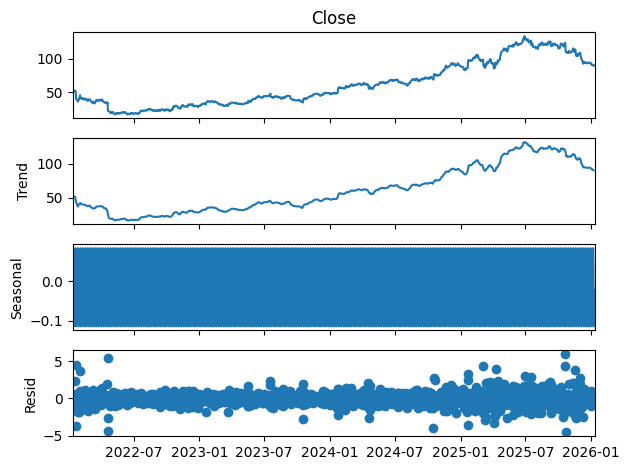

In [144]:
from statsmodels.tsa.seasonal import seasonal_decompose

DF = DF.set_index('Date')
decompose = seasonal_decompose(DF['Close'])

decompose.plot()
plt.show()

# Step 12 – ACF & PACF

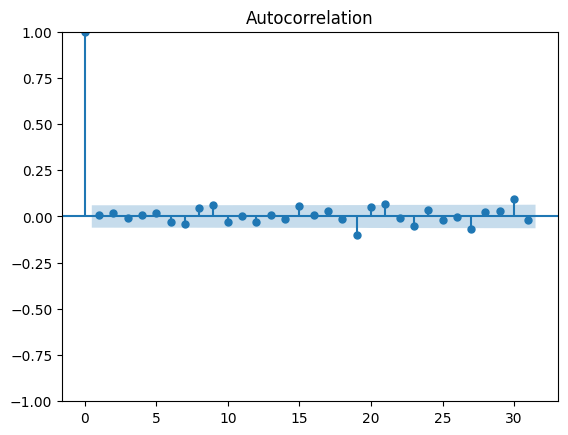

In [145]:
# p, q
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(DF['Close'].diff().dropna())
plt.show()

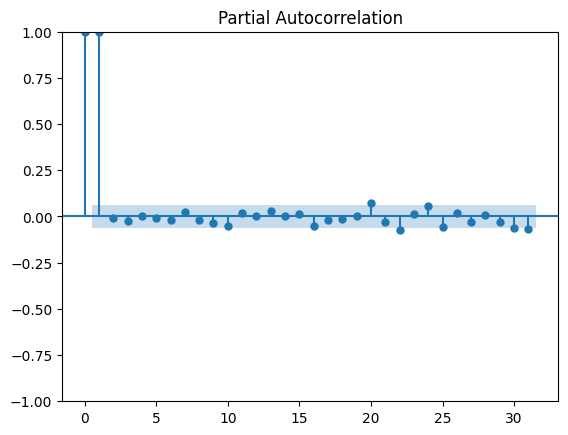

In [146]:
# q = 1
plot_pacf(DF['Close'])
plt.show()

In [149]:
#p=2,q=1,d=1
#model building

split = int(len(DF) * 0.85)
# 85% of data for train
# 15% of data for test

# Step 13 – Train-Test Split

In [150]:
train = DF.iloc[:split]
test = DF.iloc[split:]

# Step 14 – ARIMA Model

In [151]:
from statsmodels.tsa.arima.model import ARIMA

In [152]:
arima = ARIMA(train, order = (2, 1, 1))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [153]:
arima = arima.fit()

In [154]:
DF['arima_prediction']=arima.predict(start=len(train),end=len(train)+len(test)-1)

In [155]:
DF

,Close,arima_prediction
Date,,
2022-01-12 00:00:00-05:00,53.722000,NaN
2022-01-13 00:00:00-05:00,51.919998,NaN
2022-01-14 00:00:00-05:00,52.569000,NaN
2022-01-17 00:00:00-05:00,52.569000,NaN
2022-01-18 00:00:00-05:00,51.080002,NaN
...,...,...
2026-01-06 00:00:00-05:00,90.650002,125.195088
2026-01-07 00:00:00-05:00,90.730003,125.195088
2026-01-08 00:00:00-05:00,90.529999,125.195088


<Axes: xlabel='Date'>

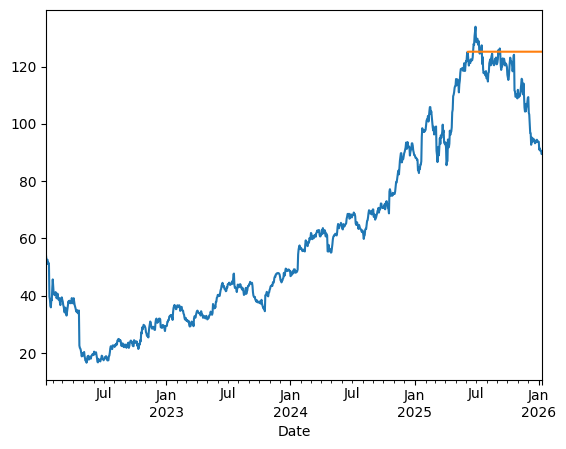

In [156]:
DF['Close'].plot()
DF['arima_prediction'].plot()

# Step 15 – SARIMA Model

In [157]:
#SARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [158]:
sarima_model = SARIMAX(train, order = (2, 1, 1), seasonal_order = (2, 1, 1, 12))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [159]:
sarima_model=sarima_model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [160]:
DF['sarima_prediction']=sarima_model.predict(start=len(train),end=len(train)+len(test)-1)
DF

,Close,arima_prediction,sarima_prediction
Date,,,
2022-01-12 00:00:00-05:00,53.722000,NaN,NaN
2022-01-13 00:00:00-05:00,51.919998,NaN,NaN
2022-01-14 00:00:00-05:00,52.569000,NaN,NaN
2022-01-17 00:00:00-05:00,52.569000,NaN,NaN
2022-01-18 00:00:00-05:00,51.080002,NaN,NaN
...,...,...,...
2026-01-06 00:00:00-05:00,90.650002,125.195088,142.592824
2026-01-07 00:00:00-05:00,90.730003,125.195088,142.816884
2026-01-08 00:00:00-05:00,90.529999,125.195088,142.942107


<Axes: xlabel='Date'>

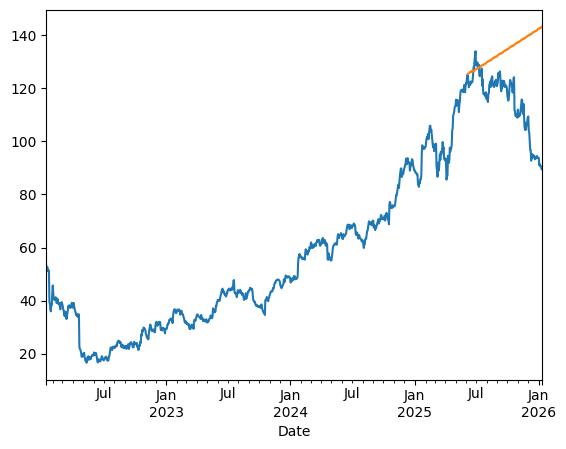

In [161]:
DF['Close'].plot()
DF['sarima_prediction'].plot()

# Conclusion :

In this project, a complete end-to-end time series forecasting pipeline was developed to predict the closing price of Netflix (NFLX) stock using historical market data. The workflow included data acquisition from Yahoo Finance, handling missing business dates, forward-filling missing values, visualization of trends, stationarity testing using the Augmented Dickey-Fuller (ADF) test, differencing to stabilize the series, and decomposition to understand trend and seasonality components.

Autocorrelation (ACF) and Partial Autocorrelation (PACF) analysis were used to identify appropriate ARIMA parameters, leading to the implementation of both ARIMA (2,1,1) and SARIMA (2,1,1)(2,1,1,12) models. Visual comparison of predicted and actual prices showed that SARIMA captured seasonal patterns more effectively than the basic ARIMA model, indicating its suitability for financial time series with recurring trends.

While the models successfully learned historical patterns, the project highlighted important areas for improvement, such as incorporating quantitative evaluation metrics (RMSE, MAE), avoiding hardcoded train-test splits, improving data handling practices, and performing true future forecasting instead of only in-sample predictions. Additionally, advanced techniques such as hyperparameter tuning, rolling validation, and deep learning models (LSTM) can further enhance prediction accuracy.

Overall, this project demonstrates strong practical understanding of time series analysis, statistical modeling, and real-world data preprocessing. With further optimization and validation, this forecasting system can evolve into a reliable analytical tool for financial trend analysis and decision support.